In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Задача 1

Постройте график.Назовите график.Сделайте именование оси x и оси y.Сделайте выводы.

1.1. Скачать данные по ссылке 

1.2 Изучите стоимости недвижимости

1.3 Изучите распределение квадратуры жилой площади

1.4 Изучите распределение года постройки

In [44]:
df = pd.read_csv('kc-house-data.csv', encoding='cp1251')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


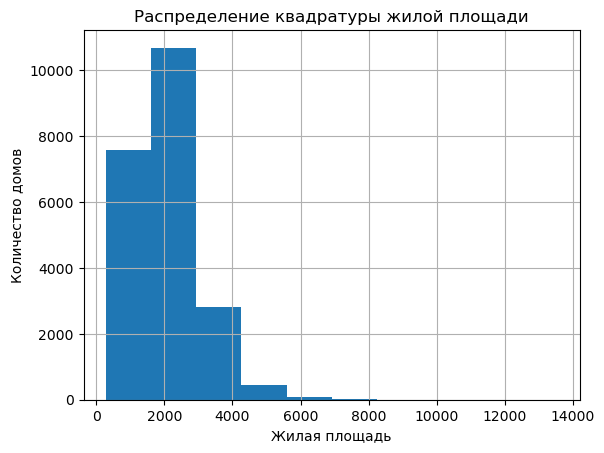

In [3]:
plt.hist(df['sqft_living'])
plt.xlabel('Жилая площадь')
plt.ylabel('Количество домов')
plt.title('Распределение квадратуры жилой площади')
plt.grid();

In [4]:
# наибольшее количество домов имеют жилую площадь в диапазоне от 1700 - 2900; очень мало домов с жилой площадью сыше 4000; 
# самая большая жилая площадь составляет порядка 8200

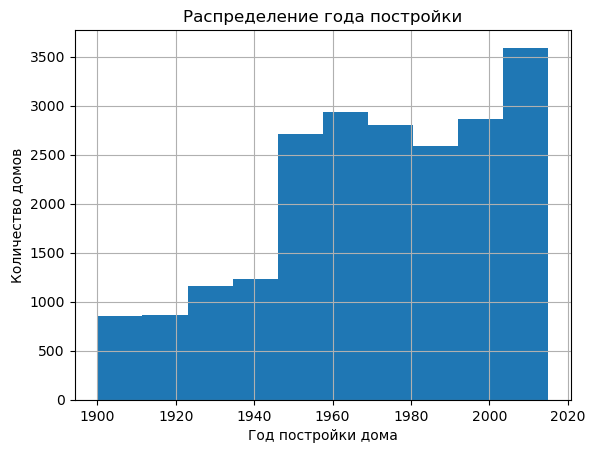

In [5]:
plt.hist(df['yr_built'])
plt.xlabel('Год постройки дома')
plt.ylabel('Количество домов')
plt.title('Распределение года постройки')
plt.grid();


In [7]:
# больше всего новых домов с годом постройки после 2004 года, количество старых домов с годом постройки до 1950 г 
# не превышает 1500 в каждом отдельном периоде

## Задача 2

### 2.1 Изучите распределение домов от наличия вида на набережную.Постройте график.Сделайте выводы.

no     21450
yes      163
Name: waterfront, dtype: int64

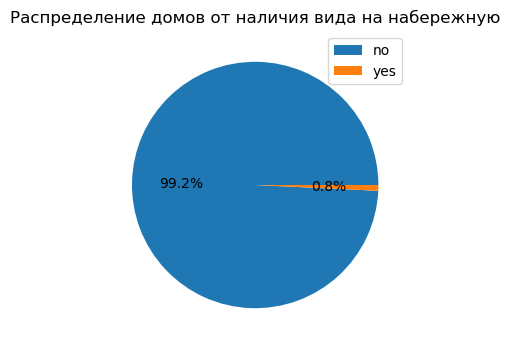

In [92]:
data = df['waterfront'].value_counts()
data.index = ['no', 'yes']
plt.figure(figsize=(6, 4))
plt.pie(data, autopct='%1.1f%%')
plt.title('Распределение домов от наличия вида на набережную')
plt.legend(data.index);
data.head()

In [19]:
# В представленной выборке большинство домов (21 450 шт. или 99,2%) не имеют вида на набережнуюю
# Крайне невысокий процент домов с видом на набережную - 0,8%.

### 2.2 Изучите распределение этажей домов

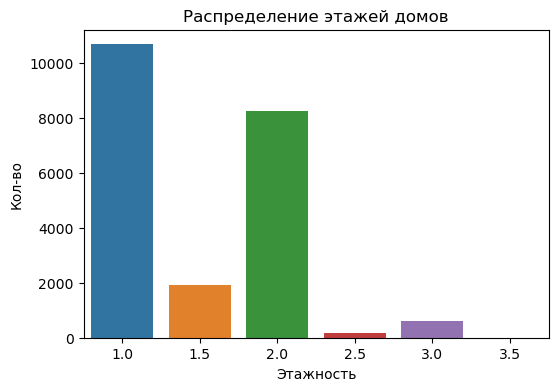

In [93]:
data1 = df['floors'].value_counts().reset_index()
plt.figure(figsize=(6, 4))
sns.barplot(x=data1['index'], y=data1['floors'])
plt.title('Распределение этажей домов')
plt.xlabel('Этажность')
plt.ylabel('Кол-во');

In [ ]:
# больше всего одноэтажных домов, на втором месте двухэтажные дома. Меньше всего домов этажностью 2,5.

### 2.3 Изучите распределение состояния домов

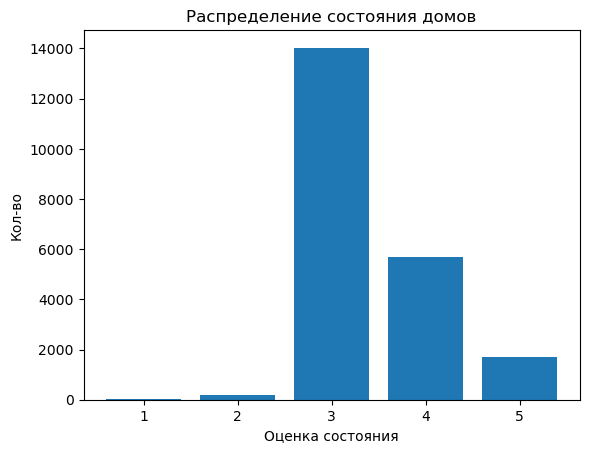

In [49]:
plt.bar(df['condition'].value_counts().index, height=df['condition'].value_counts().values);
plt.title('Распределение состояния домов')
plt.xlabel('Оценка состояния')
plt.ylabel('Кол-во');

In [45]:
# больше всего домов с удовлетворительной оценкой состояния дома, на втором мете дома с "хорошим" состоянием, 
# очень мало домов с неудовлетворительной оценкой "1" и "2".

## Задача 3

Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.

Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

In [ ]:
# Для определения характеристик недвижимости, которые влияют на стоимость недвижимости построим матрицу корреляции.

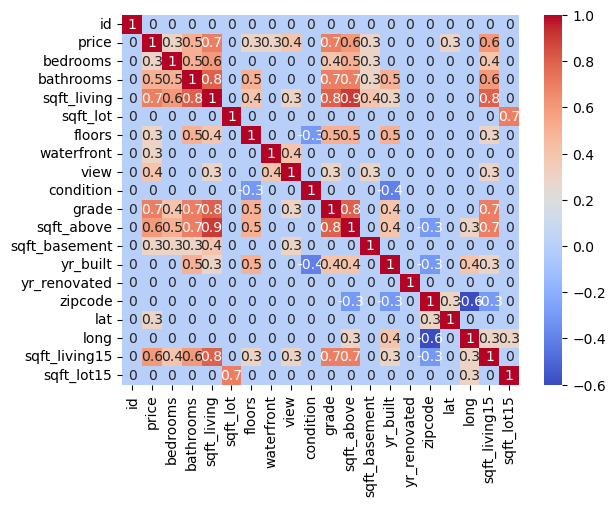

In [61]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm'); 

Исходя из представленной матрицы корреляции видно, что на стоимость недвижимости оказывают влияние следующие характеристики:
- кол-во спален;
- кол-во ванных комнат;
- жилая площадь;
- этажность;
- вид на набережную;
- общий вид;
- оценка;
- площадь над землей;
- площадь под землей и др.

In [94]:
# рассмотрим взаимосвязь отдельных характеристик недвижимости на ее стоимость

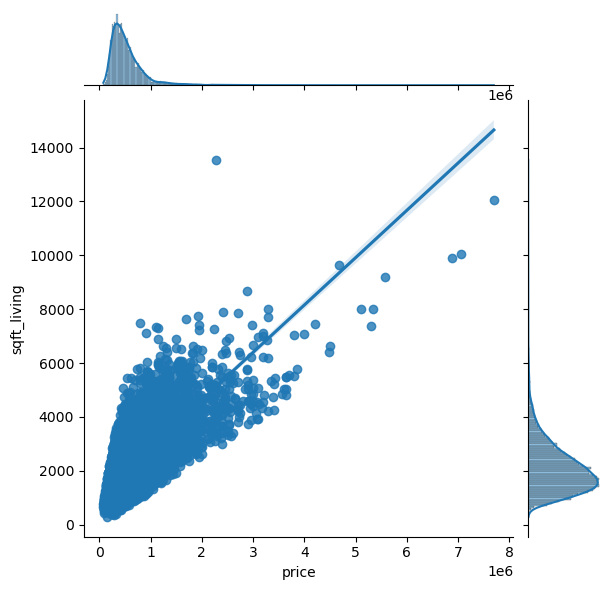

In [88]:
sns.jointplot(x=df['price'], y=df['sqft_living'], kind='reg');

In [95]:
# На представленном выше графике ярко выражена прямая линейная зависимость стоимости недвижимости 
# в зависимости от общей жилой площади.

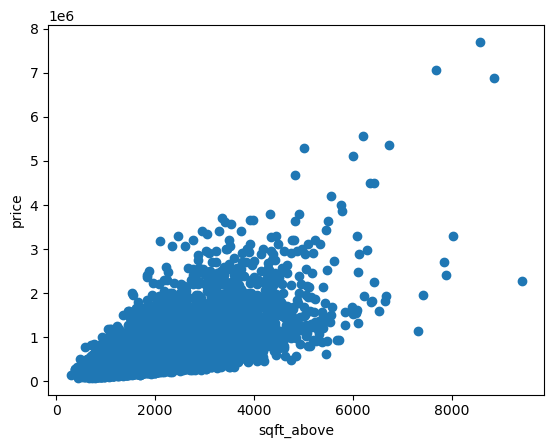

In [96]:
plt.scatter(df['sqft_above'], df['price'])
plt.xlabel('sqft_above')
plt.ylabel('price')
plt.show()

In [97]:
# на графике выше видно распределение стоимости недвижимлсти в зависимости от площади над землей 
# (прослеживается прямая линейная зависимость)

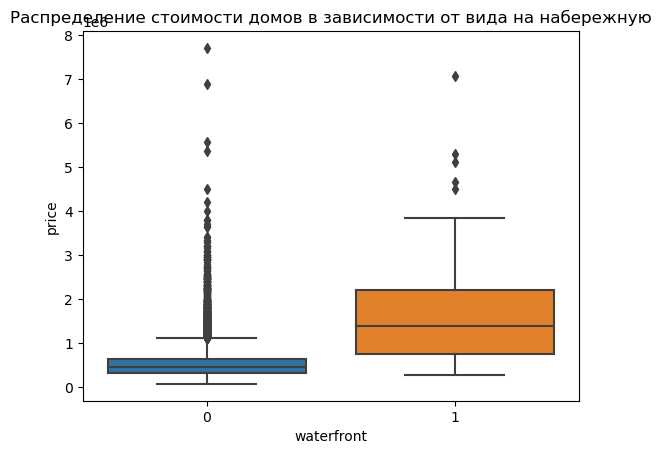

In [98]:
sns.boxplot(x='waterfront', y='price', data=df)
plt.title('Распределение стоимости домов в зависимости от вида на набережную')
plt.show()

In [ ]:
# На данном боксплоте мы наблюдаем сильную зависимость стоимости недвижимости в зависимости от вида на набережную. 
# Минимальная стоимость дома с видом на набережную выше, чем максимальная стоимость дома без соответствующего вида. 

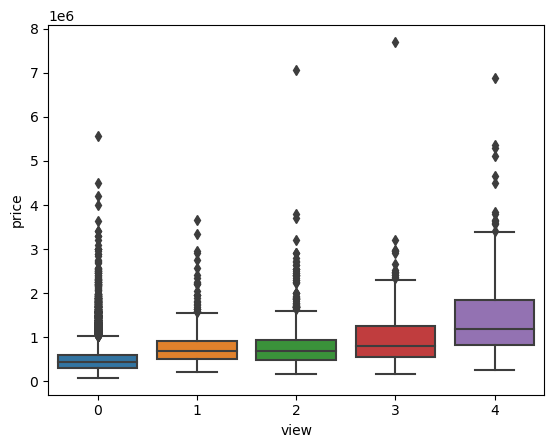

In [87]:
sns.boxplot(x='view', y='price', data=df)
plt.show()

In [ ]:
# На визуализации выше четко прослеживается влияние вида из дома на его стоимость. Вид с оценкой "2" и "3" сопостаивмы 
# по стоимости, при оценке вида выше "3" стоимость дома существенно возрастает; 

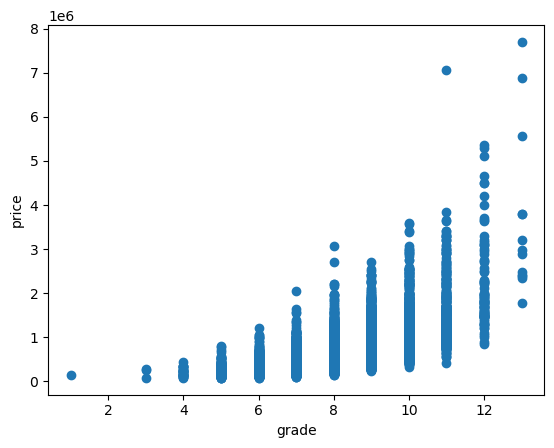

In [91]:
plt.scatter(df['grade'], df['price'])
plt.xlabel('grade')
plt.ylabel('price')
plt.show()

In [105]:
# на графике выше четко прослеживается прямая линейная зависимость между оценкой дома и стоимостью недвижимости.

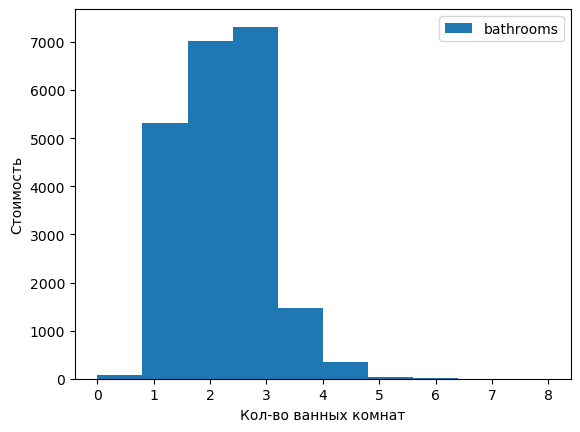

In [107]:
df.plot.hist(x='price', y='bathrooms')
plt.xlabel('Кол-во ванных комнат')
plt.ylabel('Стоимость')
plt.show()

In [ ]:
# на представленной гистограмме мы видим как меняется стоимость домов в зависимости от количества ванных комнат. Самыми
# дорогими являются дома с 3-мя ванными комнатами, затем идут дома с 2-мя ванными комнатами.
